In [1]:
import os,sys

import requests
from urllib.parse import quote_plus

from IPython.display import display, HTML
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

Object Search
----------------

This example shows how to look up the data for a single object where we know the name of the target, in this case CANDELS_GDS_F160W_J033222.31-275716.3.

In [2]:
#target = 'CANDELS_GDS_F160W_J033222.31-275716.3'
target = quote_plus('CANDELS_GDN_J123615.6+621158.3')
url = F'https://z.mast.stsci.edu/api/v0.1/object_lookup/candels?name={target}'

r = requests.get(url)

r.json()

{'data': [{'objID': 1400008176,
   'shortName': 'J123615.6+621158.3',
   'IAU_NAME': 'CANDELS_GDN_J123615.6+621158.3',
   'ra': 189.06519038,
   'dec': 62.1995285}]}

In [3]:
F"The coordinates of {target} are RA={r.json()['data'][0]['ra']} and Dec={r.json()['data'][0]['dec']}."

'The coordinates of CANDELS_GDN_J123615.6%2B621158.3 are RA=189.06519038 and Dec=62.1995285.'

Next, lets get the SED plot and the image cutouts for this galaxy.

In [4]:
url_sed = F'https://z.mast.stsci.edu/api/v0.1/sed/candels/plot/?name={target}'
sed = requests.get(url_sed)
display(HTML(str(sed.content.decode('utf-8'))))

In [5]:
url_astrocut = F"https://mast.stsci.edu/zcut/api/v0.1/astrocut?ra={r.json()['data'][0]['ra']}&dec={r.json()['data'][0]['dec']}&x=100&y=100&units=px"
os.system('curl -o test1.zip "{}"'.format(url_astrocut))
os.system('unzip -o test1.zip')
print(url_astrocut)

https://mast.stsci.edu/zcut/api/v0.1/astrocut?ra=189.06519038&dec=62.1995285&x=100&y=100&units=px


In [11]:
ls -ltr *189.06*

-rw-rw-rw-  1 imomcheva  1031  279360 Feb 13 13:52 candels_gn_60mas_189.065602_62.198740_100.0pix-x-100.0pix_astrocut.fits
-rw-rw-rw-  1 imomcheva  1031  132480 Feb 13 13:52 candels_gn_30mas_189.065602_62.198740_100.0pix-x-100.0pix_astrocut.fits
-rw-rw-rw-  1 imomcheva  1031  187200 Feb 13 13:52 goods_north_189.065602_62.198740_100.0pix-x-100.0pix_astrocut.fits
-rw-rw-rw-  1 imomcheva  1031  279360 Apr 30 17:45 candels_gn_60mas_189.065190_62.199528_100.0pix-x-100.0pix_astrocut.fits
-rw-rw-rw-  1 imomcheva  1031  132480 Apr 30 17:45 candels_gn_30mas_189.065190_62.199528_100.0pix-x-100.0pix_astrocut.fits
-rw-rw-rw-  1 imomcheva  1031  187200 Apr 30 17:45 goods_north_189.065190_62.199528_100.0pix-x-100.0pix_astrocut.fits


In [13]:
foo = fits.open('candels_gn_60mas_189.065190_62.199528_100.0pix-x-100.0pix_astrocut.fits')

In [14]:
foo.info()

Filename: candels_gn_60mas_189.065190_62.199528_100.0pix-x-100.0pix_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  CUTOUT        1 ImageHDU        40   (100, 100)   float32   
  2  CUTOUT        1 ImageHDU        40   (100, 100)   float32   
  3  CUTOUT        1 ImageHDU        44   (100, 100)   float32   
  4  CUTOUT        1 ImageHDU        44   (100, 100)   float32   
  5  CUTOUT        1 ImageHDU        40   (100, 100)   float32   
  6  CUTOUT        1 ImageHDU        44   (100, 100)   float32   


In [24]:
foo[6].header['ORIG_FLE']

'hlsp_candels_hst_wfc3_gn-tot-60mas_f125w_v1.0_drz.fits'

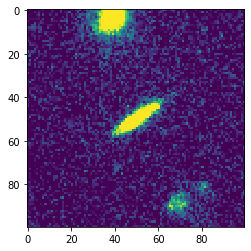

In [16]:
plt.imshow(foo[1].data, vmin=0.0, vmax=0.01)

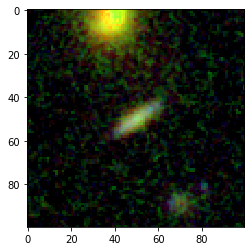

In [42]:
rgb = make_lupton_rgb(foo[3].data, foo[6].data,foo[5].data, stretch=0.05, Q=5)
plt.imshow(rgb, vmin=0.0, vmax=0.001)

REQUESTS METHOD

In [ ]:
url = 'https://mast.stsci.edu/zcut/api/v0.1/astrocut?ra=215.36067&dec=53.09557&x=5&y=7&units=s&format=jpg'
r = requests.get(url, allow_redirects=True)
open('test2.zip', 'wb').write(r.content)
os.system('unzip test2.zip')

In [ ]:
url_astrocut

In [ ]:
r = requests.get('https://mast.stsci.edu/zcut/api/v0.1/survey?ra=53.09299&dec=-27.9545383')
r.content
display(HTML(str(r.content.decode('utf-8'))))